# `FakeNewsNET` dataset - Colab

In [ ]:
import numpy as np
import pandas as pd
# from google.cloud import storage

import matplotlib.pyplot as plt

### Loading `CSV` file from GCP Buket

In [ ]:
# BUCKET_NAME='wagon-data-615-seguy'
# BUCKET_TRAIN_DATA_PATH = 'data/FakesNewsNET.csv'

def get_data_from_gcp(nrows=10000, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from GCP"""
    path = 'https://storage.googleapis.com/wagon-data-615-seguy/data/FakesNewsNET.csv'
    df = pd.read_csv(path, nrows=nrows)
    return df

In [ ]:
data = get_data_from_gcp(nrows=20000)

In [ ]:
data.shape

(15585, 8)

In [ ]:
data.head()

,title,text,authors,num_images,domain,url,category,news_type
0,Djou wins special election for Congress,Hanabusa leads Case with nearly all the votes ...,['Honolulu Star-Bulletin'],40,archive,https://web.archive.org/web/20100523122054/htt...,0,political
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,0,political
2,One in Four,One out of every four Pennsylvania households ...,['Congressman Joe Pitts'],2,medium,https://medium.com/@RepJoePitts/one-in-four-66...,0,political
3,Pastors To Protest IRS Rules on Political Advo...,"On Sept. 28, pastors from 20 states will give ...",[],4,pewforum,http://www.pewforum.org/2008/09/19/pastors-to-...,0,political
4,“Dictionary” on President Obama’s Health Care ...,WASHINGTON – The Republican National Committee...,"['Written On September', 'Republican National ...",32,archive,https://web.archive.org/web/20091003005639/htt...,0,political


### Install `StopFAIke` package

In [ ]:
! pip install --quiet git+https://github.com/EddyEdzwan/StopFAIke.git

     |████████████████████████████████| 141 kB 6.5 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 185 kB 33.4 MB/s 
     |████████████████████████████████| 14.4 MB 62 kB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 743 kB 22.4 MB/s 
     |████████████████████████████████| 722 kB 25.9 MB/s 
     |████████████████████████████████| 41 kB 539 kB/s 
     |████████████████████████████████| 68 kB 6.6 MB/s 
     |████████████████████████████████| 1.3 MB 38.0 MB/s 
     |████████████████████████████████| 118 kB 49.6 MB/s 
     |████████████████████████████████| 294 kB 49.1 MB/s 
     |████████████████████████████████| 142 kB 50.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 170 kB 39.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |██████████████████████

In [ ]:
# from StopFAIke.data import clean

# data['clean_text'] = data['text'].apply(clean)
# data['clean_text'].head()

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

# Required only for Colab
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean(text):
    """
    Provided by Le Wagon - Machine Learning - NLP
    Preprocessing articles - punctuation / lowercased / tokenize / stop_words / lemmatize
    """
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma = WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['title'].sample(10)

6319     ‘Saturday Night Live’ and ‘Westworld’ lead Emm...
3365     My Big Fat Greek Wedding's Lainie Kazan Denies...
13556    Caitlyn Jenner 'Wasn't Happy at First' About K...
443      The Kardashians donate whopping sum to Las Veg...
13807    Kesha Shows Support for Taylor Swift With Hear...
9279     Gwyneth Paltrow Admits She's 'a Little Scared'...
9145     Daniel Dae Kim Grateful For ‘Hawaii Five-O,’ S...
2479     Shailene Woodley Makes Her Red Carpet Debut wi...
3598     Hilary Duff adopted an adorable rescue puppy, ...
9171     Robert Pattinson 'splits' with fiancée FKA Twi...
Name: title, dtype: object

In [ ]:
data['clean_text'] = data['text'].apply(clean)
data['clean_title'] = data['title'].apply(clean)

### Training

In [ ]:
X_text = data['clean_text'].copy()
X_title = data['clean_title'].copy()
y = data['category'].copy()

print('-'*80)
print(f"X_text shape: {X_text.shape}")
print(f"X_title shape: {X_title.shape}")
print(f"y shape: {y.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X_text shape: (15585,)
X_title shape: (15585,)
y shape: (15585,)
--------------------------------------------------------------------------------


In [ ]:
from sklearn.model_selection import train_test_split

X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)
X_title_train, X_title_test, y_train, y_test = train_test_split(X_title, y, test_size=0.3, random_state=42)


print('-'*80)
print(f"X_text_train shape: {X_text_train.shape}")
print(f"X_title_train shape: {X_title_train.shape}")
print(f"y_train shape: {y_train.shape}")
print('-'*80)
print(f"X_text_test shape: {X_text_test.shape}")
print(f"X_title_test shape: {X_title_test.shape}")
print(f"y_test shape: {y_test.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X_text_train shape: (10909,)
X_title_train shape: (10909,)
y_train shape: (10909,)
--------------------------------------------------------------------------------
X_text_test shape: (4676,)
X_title_test shape: (4676,)
y_test shape: (4676,)
--------------------------------------------------------------------------------


In [ ]:
X_text_train

5391     [big, name, board, help, tell, story, philip, ...
2893     [jim, bob, michelle, jim, bob, michelle, dugga...
14469    [kim, kardashian, fine, report, surfaced, e, r...
15328    [advertisement, forget, will, kate, dusty, old...
5483     [fittingly, met, hit, show, family, tie, love,...
                               ...                        
5191     [famous, ugly, marc, anthony, say, secret, suc...
13418    [justin, bieber, amazing, selena, gomez, since...
5390            [experience, vogue, september, issue, get]
860      [jared, leto, hitchhiking, across, america, pr...
7270     [looking, good, duff, goldman, former, ace, ca...
Name: clean_text, Length: 10909, dtype: object

In [ ]:
X_title_train

5391     [janelle, monae, juno, temple, join, philip, k...
2893                                      [duggar, family]
14469      [kim, kardashian, responds, claim, attacked, l]
15328    [prince, harry, meghan, markle, house, hunting...
5483     [truth, michael, j, fox, tracy, pollan, inspir...
                               ...                        
5191     [marc, anthony, say, secret, success, forced, ...
13418    [justin, bieber, showering, selena, gomez, tlc...
5390     [fashion, show, fashion, week, runway, designe...
860      [jared, leto, hitchhiking, across, america, pr...
7270     [ace, cake, star, duff, goldman, show, dramati...
Name: clean_title, Length: 10909, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
text_tokenizer = Tokenizer()
title_tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
text_tokenizer.fit_on_texts(X_text_train)
title_tokenizer.fit_on_texts(X_title_train)

    
# We apply the tokenization to the train and test set
X_text_train_token = text_tokenizer.texts_to_sequences(X_text_train)
X_title_train_token = title_tokenizer.texts_to_sequences(X_title_train)

X_text_test_token = text_tokenizer.texts_to_sequences(X_text_test)
X_title_test_token = title_tokenizer.texts_to_sequences(X_title_test)

print('-'*80)
print(f"X_text_train_token shape: {len(X_text_train_token)}")
print(f"X_title_train_token shape: {len(X_title_train_token)}")
print(f"X_text_test_token shape: {len(X_text_test_token)}")
print(f"X_title_test_token shape: {len(X_title_test_token)}")
print('-'*80)

--------------------------------------------------------------------------------
X_text_train_token shape: 10909
X_title_train_token shape: 10909
X_text_test_token shape: 4676
X_title_test_token shape: 4676
--------------------------------------------------------------------------------


In [ ]:
text_vocab_size = len(text_tokenizer.word_index)
title_vocab_size = len(title_tokenizer.word_index)

print('-'*80)
print(f"text vocab_size: {text_vocab_size}")
print(f"title vocab_size: {title_vocab_size}")
print('-'*80)

--------------------------------------------------------------------------------
text vocab_size: 73360
title vocab_size: 10958
--------------------------------------------------------------------------------


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_text_train_pad = pad_sequences(X_text_train_token, maxlen=None, dtype='float32', padding='post')
X_title_train_pad = pad_sequences(X_title_train_token, maxlen=None, dtype='float32', padding='post')

X_text_test_pad = pad_sequences(X_text_test_token, maxlen=None, dtype='float32', padding='post')
X_title_test_pad = pad_sequences(X_title_test_token, maxlen=None, dtype='float32', padding='post')

# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_text_train_pad shape: {X_text_train_pad.shape}")
print(f"X_title_train_pad shape: {X_title_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_text_test_pad shape: {X_text_test_pad.shape}")
print(f"X_title_test_pad shape: {X_title_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

--------------------------------------------------------------------------------
X_text_train_pad shape: (10909, 10018)
X_title_train_pad shape: (10909, 26)
y_train shape: 10909
--------------------------------------------------------------------------------
X_text_test_pad shape: (4676, 9470)
X_title_test_pad shape: (4676, 20)
y_test shape: 4676
--------------------------------------------------------------------------------


## Model

In [ ]:
def init_model():

    embedding_size = 5

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim = text_vocab_size+1,
        input_length = X_text_train_pad.shape[1],
#         input_length = X_train_pad.shape[1], # Max_sentence_length (optional, for model summary)
        output_dim = embedding_size,# 100
        mask_zero = True, # Included masking layer :)
    ))

    model.add(tf.keras.layers.LSTM(20, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(l2=0.02)))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [ ]:
init_model().summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10018, 5)          366805    
_________________________________________________________________
lstm_10 (LSTM)               (None, 20)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 368,996
Trainable params: 368,996
Non-trainable params: 0
_________________________________________________________________


## Training on `text` input data

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

text_model = init_model()

history = text_model.fit(X_text_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=15, 
                  callbacks=[es],
                  verbose=1)

Epoch 1/15
137/137 [==============================] - 57s 376ms/step - loss: 0.7116 - accuracy: 0.6888 - val_loss: 0.6329 - val_accuracy: 0.6971
Epoch 2/15
137/137 [==============================] - 47s 346ms/step - loss: 0.5701 - accuracy: 0.7411 - val_loss: 0.5320 - val_accuracy: 0.7846
Epoch 3/15
137/137 [==============================] - 46s 337ms/step - loss: 0.4772 - accuracy: 0.8178 - val_loss: 0.4721 - val_accuracy: 0.8139
Epoch 4/15
137/137 [==============================] - 45s 330ms/step - loss: 0.4254 - accuracy: 0.8355 - val_loss: 0.5410 - val_accuracy: 0.7759
Epoch 5/15
137/137 [==============================] - 45s 329ms/step - loss: 0.3872 - accuracy: 0.8544 - val_loss: 0.4887 - val_accuracy: 0.8144
Epoch 6/15
137/137 [==============================] - 45s 331ms/step - loss: 0.3576 - accuracy: 0.8720 - val_loss: 0.7285 - val_accuracy: 0.8158
Epoch 7/15
137/137 [==============================] - 44s 323ms/step - loss: 0.3222 - accuracy: 0.8895 - val_loss: 0.5794 - val_ac

In [ ]:
def plot_loss(history, title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('ACC')
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    if title:
        fig.suptitle(title)
    plt.show()

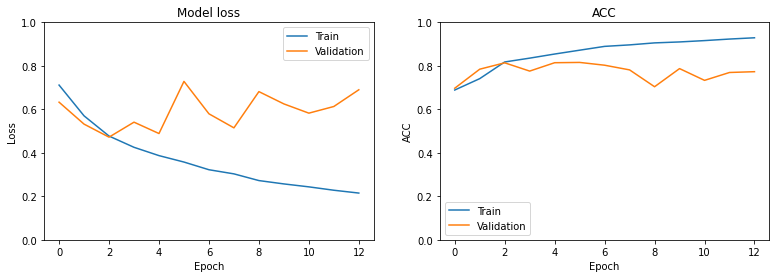

In [ ]:
plot_loss(history, title=None)

In [ ]:
results = text_model.evaluate(X_text_test_pad, y_test)

print('-'*80)
print(f"test score (ACC): {results[1]:.3f}")
print('-'*80)

147/147 [==============================] - 19s 121ms/step - loss: 0.4554 - accuracy: 0.8159
--------------------------------------------------------------------------------
test score (ACC): 0.816
--------------------------------------------------------------------------------


In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def get_metrics(y_true, X, model):

    y_prob = model.predict(X)
    y_pred = np.where(y_prob > 0.5, 1, 0)

    conf_matrix = confusion_matrix(y_test, y_pred)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('-'*80)
    print(f"acc: {acc*100:.2f}%")
    print(f"recall: {recall*100:.2f}%")
    print(f"precision: {precision*100:.2f}%")
    print(f"f1: {f1*100:.2f}%")
    print('-'*80)

    sns.heatmap(conf_matrix, annot=True, fmt="d");

--------------------------------------------------------------------------------
acc: 81.59%
recall: 54.91%
precision: 75.80%
f1: 63.69%
--------------------------------------------------------------------------------


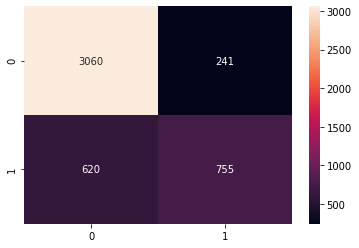

In [ ]:
get_metrics(y_test, X_text_test_pad, text_model)

## Training on `title` data

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

title_model = init_model()

history = title_model.fit(X_title_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=15, 
                  callbacks=[es],
                  verbose=1)

Epoch 1/15
137/137 [==============================] - 9s 26ms/step - loss: 0.7174 - accuracy: 0.6889 - val_loss: 0.6330 - val_accuracy: 0.6971
Epoch 2/15
137/137 [==============================] - 2s 16ms/step - loss: 0.5824 - accuracy: 0.6896 - val_loss: 0.5368 - val_accuracy: 0.6971
Epoch 3/15
137/137 [==============================] - 2s 17ms/step - loss: 0.5130 - accuracy: 0.6895 - val_loss: 0.5137 - val_accuracy: 0.6971
Epoch 4/15
137/137 [==============================] - 2s 16ms/step - loss: 0.4802 - accuracy: 0.7915 - val_loss: 0.5011 - val_accuracy: 0.7860
Epoch 5/15
137/137 [==============================] - 2s 17ms/step - loss: 0.4481 - accuracy: 0.8183 - val_loss: 0.5173 - val_accuracy: 0.7447
Epoch 6/15
137/137 [==============================] - 2s 16ms/step - loss: 0.4191 - accuracy: 0.8274 - val_loss: 0.4844 - val_accuracy: 0.7860
Epoch 7/15
137/137 [==============================] - 2s 16ms/step - loss: 0.4020 - accuracy: 0.8437 - val_loss: 0.4955 - val_accuracy: 0.7764

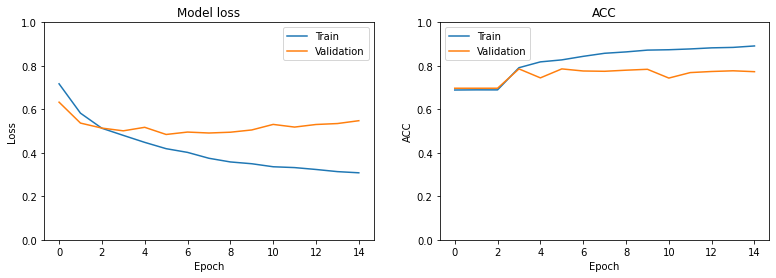

In [ ]:
plot_loss(history, title=None)

In [ ]:
results = title_model.evaluate(X_title_test_pad, y_test)

print('-'*80)
print(f"test score (ACC): {results[1]:.3f}")
print('-'*80)

147/147 [==============================] - 1s 5ms/step - loss: 0.5185 - accuracy: 0.7947
--------------------------------------------------------------------------------
test score (ACC): 0.795
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
acc: 79.47%
recall: 59.56%
precision: 66.97%
f1: 63.05%
--------------------------------------------------------------------------------


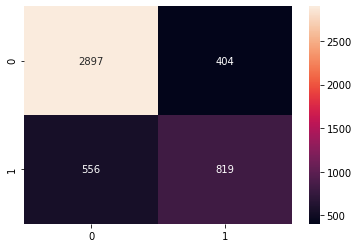

In [ ]:
get_metrics(y_test, X_title_test_pad, title_model)